# Titanic Dataset

Predicting wheather a Passenger would survive or not

Attribute Information:
    
* Survived : Survival(0 = No, 1 = Yes)
* Pclass : Ticket class( 1 = 1st, 2 = 2nd, 3 = 3rd)
* sex : Sex 
* Age : Age in years
* SibSp : Number of siblings / spouses aboard the Titanic
* Parch : Number of parents / children aboard the Titanic
* Ticket : Ticket number
* Fare : Passenger fare
* Cabin : Cabin number
* Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [111]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [112]:
df_titanic=pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
#dropping Name nad PassengerId columns as it is of no use in the dataset
df_titanic.drop(['Name','PassengerId'],axis=1,inplace=True)

In [114]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
df_titanic.shape

(891, 10)

In [116]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [117]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
df_titanic.Pclass.unique()

array([3, 1, 2])

In [119]:
df_titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [120]:
#checking the null values
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

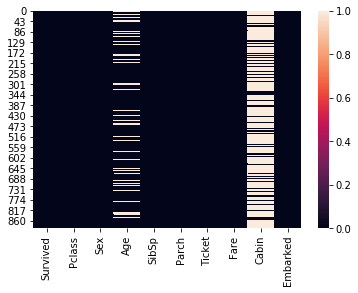

In [121]:
sns.heatmap(df_titanic.isnull())

Dataset has missing values in "Age", "Cabin" and "Embarked" columns

# Filling missing data

In [122]:
#filling null values of numerical data
df_titanic['Age']=df_titanic['Age'].replace(np.NaN,df_titanic['Age'].mean())

In [123]:
#filling null values of categorical data
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().values[0],inplace=True)
df_titanic['Cabin'].fillna(df_titanic['Cabin'].mode().values[0],inplace=True)

In [124]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [125]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [126]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


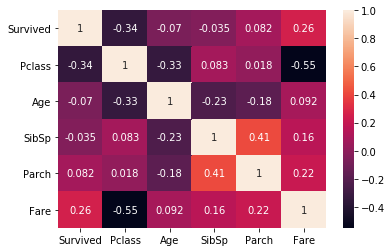

In [128]:
sns.heatmap(df_titanic.corr(), annot=True)

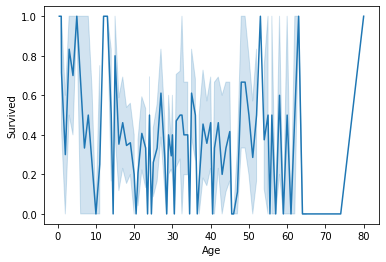

In [129]:
sns.lineplot(x='Age',y='Survived',data=df_titanic)

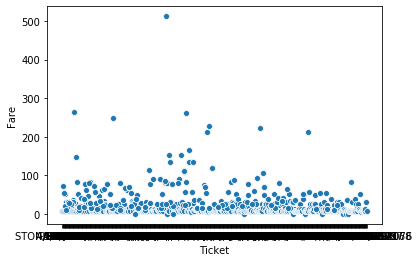

In [130]:
sns.scatterplot(x='Ticket',y='Fare',data=df_titanic)

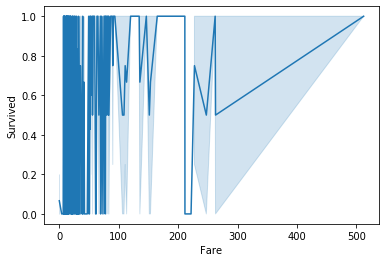

In [131]:
sns.lineplot(x='Fare',y='Survived',data=df_titanic)
plt.show()

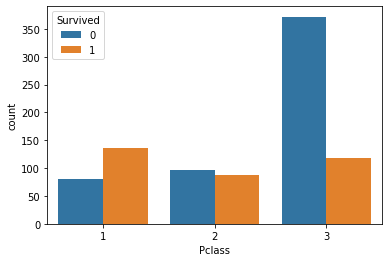

In [132]:
sns.countplot(x='Pclass',hue='Survived',data=df_titanic)
plt.show()

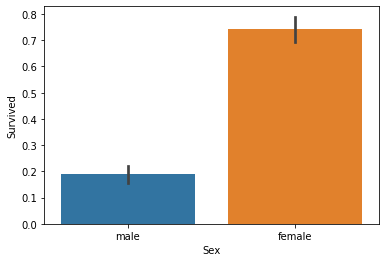

In [133]:
sns.barplot(x='Sex',y='Survived',data=df_titanic)
#Female passenger have more survival 

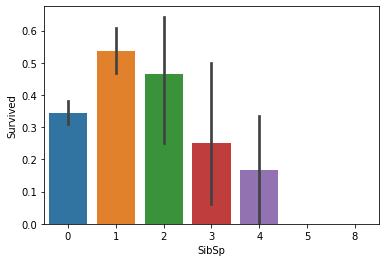

In [134]:
sns.barplot(x='SibSp',y='Survived',data=df_titanic)
#passengers with one or two sibblings or spouse have survived more.

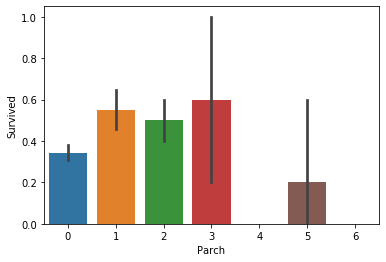

In [135]:
sns.barplot(x='Parch',y='Survived',data=df_titanic)

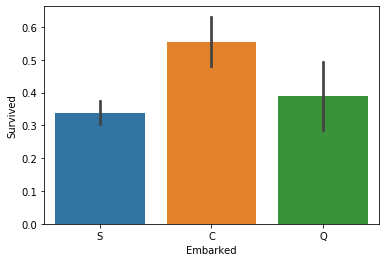

In [136]:
sns.barplot(x='Embarked',y='Survived',data=df_titanic)
plt.show()

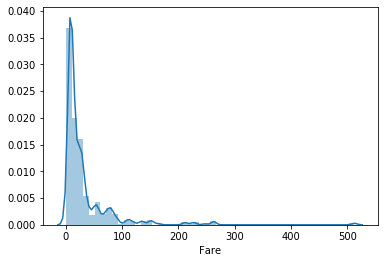

In [137]:
sns.distplot(df_titanic['Fare'])
#The data is skewed

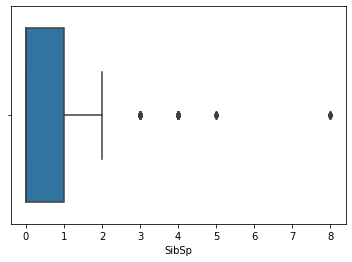

In [138]:
sns.boxplot(df_titanic['SibSp'])
#There are few extreme outliers

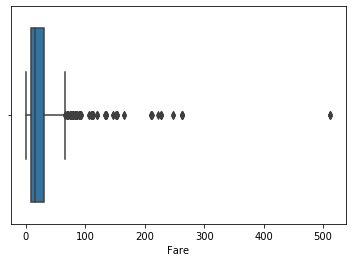

In [139]:
sns.boxplot(df_titanic['Fare'])
#There are many outliers

In [140]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])
df_titanic['Cabin']=le.fit_transform(df_titanic['Cabin'])
df_titanic['Ticket']=le.fit_transform(df_titanic['Ticket'])
df_titanic['Embarked']=le.fit_transform(df_titanic['Embarked'])

In [141]:
#Removing outliers
print('The shape before removing outliers',df_titanic.shape)
from scipy.stats import zscore
z=np.abs(zscore(df_titanic))
df_titanic=df_titanic[(z<3).all(axis=1)]
print('The shape after removing outliers',df_titanic.shape)

The shape before removing outliers (891, 10)
The shape after removing outliers (786, 10)


In [142]:
df_titanic.skew()

Survived    0.482496
Pclass     -0.682742
Sex        -0.696326
Age         0.369202
SibSp       2.036616
Parch       2.202885
Ticket      0.023532
Fare        2.385572
Cabin       2.136288
Embarked   -1.257553
dtype: float64

In [143]:
#Reducing skewness using sqrt function
for col in df_titanic.columns:
    if df_titanic.skew().loc[col]>0.55:
        df_titanic[col]=np.sqrt(df_titanic[col])    

In [144]:
df_titanic.skew()

Survived    0.482496
Pclass     -0.682742
Sex        -0.696326
Age         0.369202
SibSp       1.178528
Parch       1.806738
Ticket      0.023532
Fare        1.405929
Cabin       0.226321
Embarked   -1.257553
dtype: float64

In [145]:
#Further Analysis
df_titanic.groupby(['Age']).mean()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,
0.42,1.0,3.00,1.00,0.000000,1.000000,174.00,2.918339,6.855655,0.0
0.67,1.0,2.00,1.00,1.000000,1.000000,166.00,3.807887,6.855655,2.0
0.75,1.0,3.00,0.00,1.414214,1.000000,194.00,4.388428,6.855655,0.0
0.83,1.0,2.00,1.00,0.500000,1.207107,197.50,4.857646,6.855655,2.0
0.92,1.0,1.00,1.00,1.000000,1.414214,37.00,12.310565,7.874008,2.0
...,...,...,...,...,...,...,...,...,...
62.00,0.5,1.25,0.75,0.000000,0.000000,184.75,5.622495,6.851080,2.0
63.00,1.0,2.00,0.00,0.500000,0.000000,280.00,5.962884,8.742900,2.0
64.00,0.0,1.00,1.00,0.000000,0.000000,501.00,5.099020,6.855655,2.0


In [146]:
df_titanic['Age_group']=df_titanic['Age'].astype(int)
df_titanic['Age_group'].replace(range(0,6),('Infant'),inplace=True)
df_titanic['Age_group'].replace(range(6,19),('Child'),inplace=True)
df_titanic['Age_group'].replace(range(19,60),('Adult'),inplace=True)
df_titanic['Age_group'].replace(range(60,100),('Elderly'),inplace=True)

In [147]:
df_titanic[('Age_group')].value_counts()

Adult      664
Child       76
Infant      29
Elderly     17
Name: Age_group, dtype: int64

In [148]:
df_titanic.groupby(['Age_group']).mean()
#The survival rate in infants is high.
#Fare for elderly seems to be higher than other age group

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age_group,,,,,,,,,,
Adult,0.356928,2.322289,0.689759,31.802038,0.271738,0.141843,339.162651,4.391513,7.041236,1.543675
Child,0.447368,2.552632,0.500000,15.006579,0.400510,0.428373,337.355263,4.377502,6.946573,1.473684
Elderly,0.352941,1.529412,0.764706,62.176471,0.235294,0.176471,223.117647,5.667885,7.125518,1.588235
Infant,0.827586,2.482759,0.448276,2.419655,0.833477,1.136916,308.275862,5.158719,6.798528,1.448276


In [149]:
df_titanic.groupby(['Sex']).mean()
#The survival rate of female is higher than men
#Fare is higher for women which may indicate that women travelled in higher class

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,
0,0.761364,2.170455,28.216882,0.455744,0.366171,313.303030,5.330308,7.173069,1.405303
1,0.191571,2.415709,30.526756,0.227447,0.126517,346.482759,3.998871,6.950040,1.599617


In [150]:
#dropping the Age_group column as we created it for our data analysis purpose
df_titanic.drop(['Age_group'],axis=1,inplace=True)

In [153]:
#Splitting the data into target and input 
x=df_titanic.drop('Survived',axis=1)
y=pd.DataFrame(df_titanic['Survived'])

In [154]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [155]:
x.shape

(786, 9)

In [156]:
y.shape

(786, 1)

In [157]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [158]:
#Finding out the best random state
max_accuracy_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state, " is: ",acc_scr)
    if acc_scr>max_accuracy_score:
        max_accuracy_score=acc_scr
        final_r_state=r_state
        
print("max accuracy score corresponding to",final_r_state," is ",max_accuracy_score)     

accuracy_score corresponding to random state: 42  is:  0.7215189873417721
accuracy_score corresponding to random state: 43  is:  0.7721518987341772
accuracy_score corresponding to random state: 44  is:  0.8164556962025317
accuracy_score corresponding to random state: 45  is:  0.759493670886076
accuracy_score corresponding to random state: 46  is:  0.7911392405063291
accuracy_score corresponding to random state: 47  is:  0.7848101265822784
accuracy_score corresponding to random state: 48  is:  0.8227848101265823
accuracy_score corresponding to random state: 49  is:  0.7848101265822784
accuracy_score corresponding to random state: 50  is:  0.8227848101265823
accuracy_score corresponding to random state: 51  is:  0.810126582278481
accuracy_score corresponding to random state: 52  is:  0.810126582278481
accuracy_score corresponding to random state: 53  is:  0.7341772151898734
accuracy_score corresponding to random state: 54  is:  0.7911392405063291
accuracy_score corresponding to random st

In [159]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=86,test_size=0.20)

In [160]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x,y,cv=5,scoring="accuracy").mean()

0.7913569297750545

# Using GridSearchCV to select the best parameter

In [161]:
#best parameters for SVC

from sklearn.model_selection import GridSearchCV
svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [162]:
#best parameters for KNeighbors

knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 5}

In [163]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [164]:
#best parameters for RandomForest

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 1000}



[1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 0]
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8734177215189873


The CV Score is 0.7913569297750545


[[90 15]
 [ 5 48]]


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.76      0.91      0.83        53

    accuracy                           0.87       158
   macro avg       0.85      0.

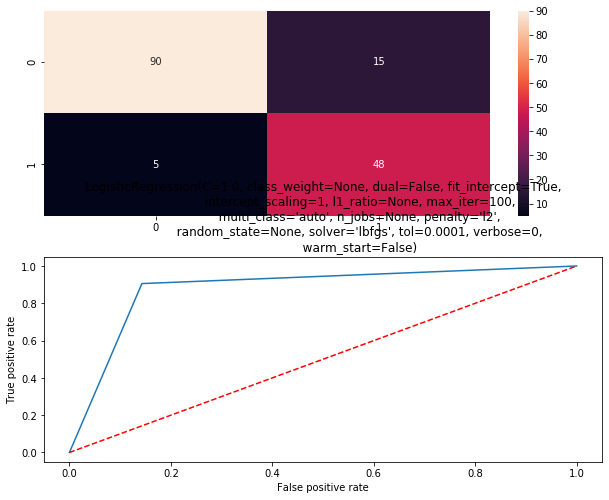



[1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 0 0 0]
Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: 0.8291139240506329


The CV Score is 0.7990244295734902


[[90 15]
 [12 41]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       105
           1       0.73      0.77      0.75        53

    accuracy                           0.83       158
   macro avg       0.81      0.82      0.81       158
weighted avg       0.83      0.83      0.83       158



roc_auc_score 0.8153638814016173


AxesSubplot(0.125,0.8087

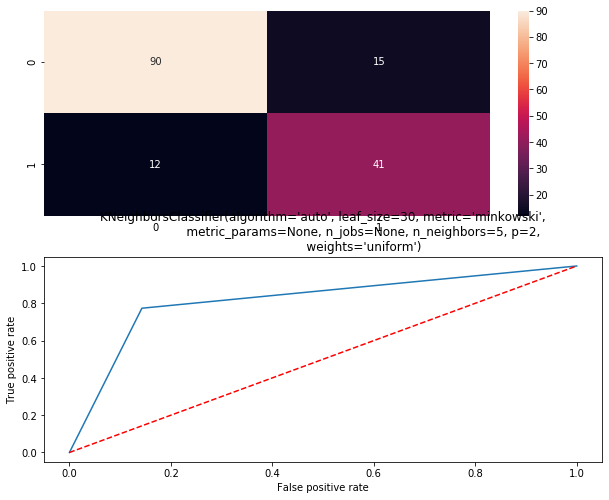



[1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 0 1 0 0]
Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.7721518987341772


The CV Score is 0.7824881077158752


[[81 24]
 [12 41]]


              precision    recall  f1-score   support

           0       0.87      0.77      0.82       105
           1       0.63      0.77      

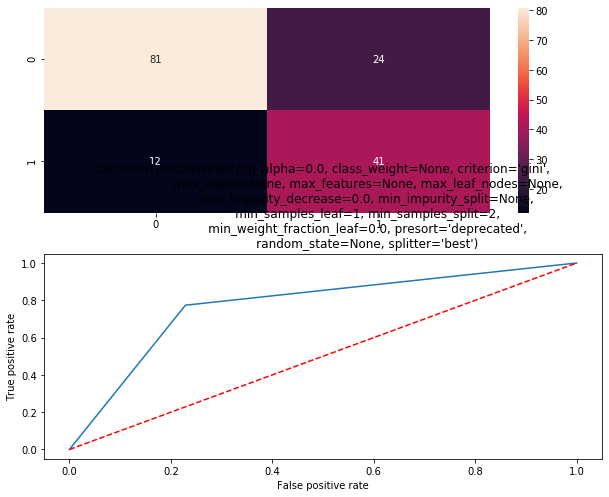



[1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 1 0 0]
Accuracy score of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 0.8544303797468354


The CV Score is 0.8181085221317422


[[94 11]
 [12 41]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       105
           1       0.79      0.77      0.78        53

    accuracy                           0.85       158
   macro avg       0.84      0.83      0.84       158
weighted avg       0.85      0.85      0.85       158


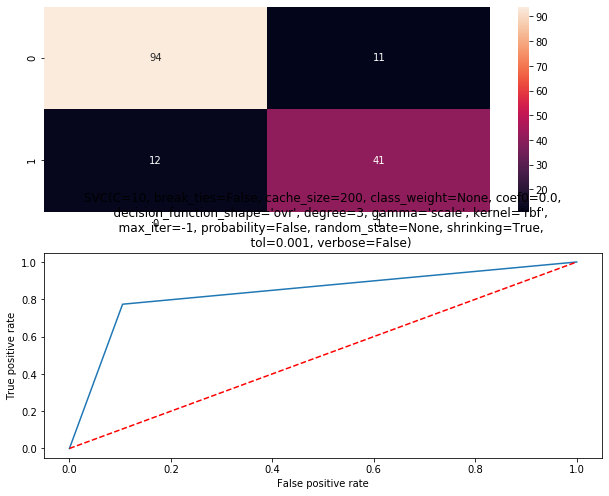



[1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0]
Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.8607594936708861


The CV Score is 0.8270337821494801


[[91 14]
 [ 8 45]]


              precision    

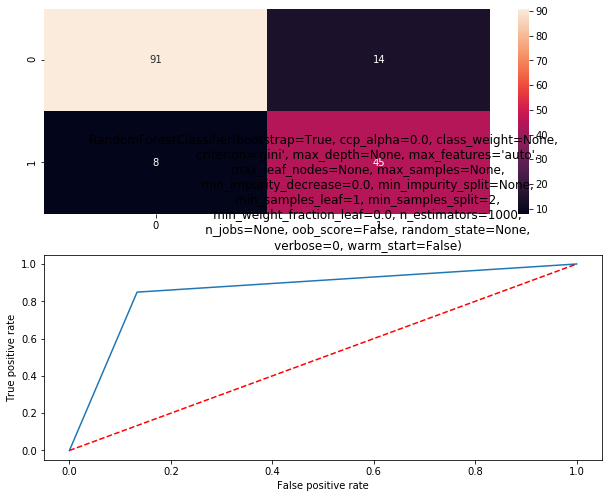



[1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 1 0 1 0 1]
Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is: 0.8227848101265823


The CV Score is 0.767282109167137


[[91 14]
 [14 39]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.74      0.74      0.74        53

    accuracy                           0.82       158
   macro avg       0.80      0.80      0.80       158
weighted avg       0.82      0.82      0.82       158



roc_auc_score 0.8012578616352202


AxesSubplot(0.125,0.808774;0.62x0.0712264)


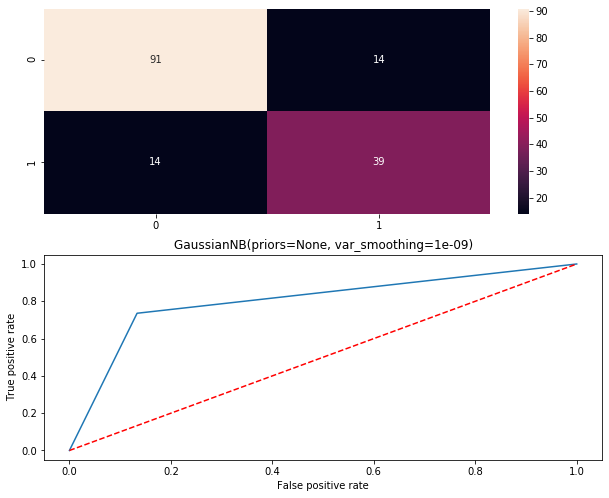

In [165]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(criterion='gini'),SVC(kernel='rbf',C=10),RandomForestClassifier(n_estimators=1000),GaussianNB()]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(pred)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [166]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','RandomForestClassifier','GaussianNB'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_Score,Cross_val_score
0,LogisticRegression,0.873418,0.791357
1,KNeighborsClassifier,0.829114,0.799024
2,DecisionTreeClassifier,0.772152,0.782488
3,SVC,0.854430,0.818109
4,RandomForestClassifier,0.860759,0.827034
5,GaussianNB,0.822785,0.767282


Since LogisticRegression is giving better results,we finalize the same

In [167]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lg,'titanic_lg.pkl')

['titanic_lg.pkl']